# Aprendizagem - Homework 2

>Maria João Rosa - ist1102506  
>Mariana Miranda - ist1102904  
>Grupo 60  

## 1. a.

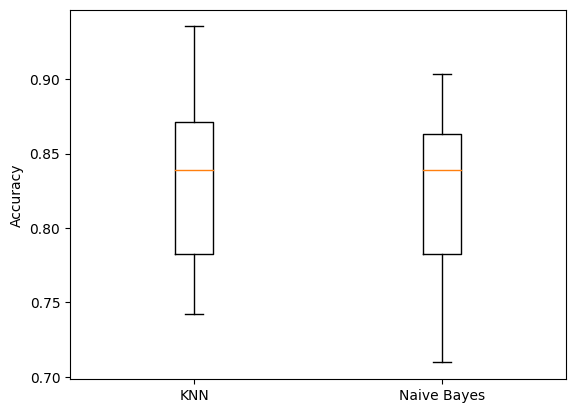

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt
import numpy as np

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
y = df['class'].astype(str)
x = df.drop('class', axis=1).astype(np.float64)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()

knn_scores = []
naive_bayes_scores = []
for train_index, test_index in skf.split(x, y):
	x_train, x_test = df.iloc[train_index, :-1], df.iloc[test_index, :-1]
	y_train, y_test = df.iloc[train_index, -1], df.iloc[test_index, -1]
	x_train = x_train.astype(np.float64)
	x_test = x_test.astype(np.float64)
	y_train = y_train.astype(str)
	y_test = y_test.astype(str)
	knn.fit(x_train, y_train)
	knn_scores.append(knn.score(x_test, y_test))
	naive_bayes.fit(x_train, y_train)
	naive_bayes_scores.append(naive_bayes.score(x_test, y_test))

plt.boxplot([knn_scores, naive_bayes_scores])
plt.xticks([1, 2], ['KNN', 'Naive Bayes'])
plt.ylabel('Accuracy')
plt.show()

## 1. b.

In [2]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(knn_scores, naive_bayes_scores)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.921, p=0.381


## 2.

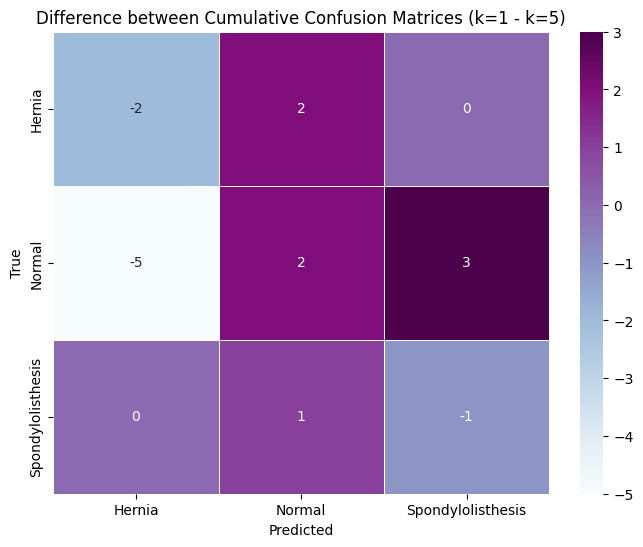

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

cumulative_cm1 = np.zeros((3, 3))
cumulative_cm5 = np.zeros((3, 3))


for train_index, test_index in skf.split(x, y):
    
	x_train, x_test = df.iloc[train_index, :-1], df.iloc[test_index, :-1]
	y_train, y_test = df.iloc[train_index, -1], df.iloc[test_index, -1]
	x_train = x_train.astype(np.float64)
	x_test = x_test.astype(np.float64)
	y_train = y_train.astype(str)
	y_test = y_test.astype(str)
    
	knn1.fit(x_train, y_train)
	knn5.fit(x_train, y_train)

	y_pred1 = knn1.predict(x_test)
	y_pred5 = knn5.predict(x_test)

	cm1 = confusion_matrix(y_test, y_pred1)
	cm5 = confusion_matrix(y_test, y_pred5)
    
	cumulative_cm1 += cm1
	cumulative_cm5 += cm5


diff_cm = cumulative_cm1 - cumulative_cm5

diff_cm = pd.DataFrame(diff_cm, index=['Hernia', 'Normal', 'Spondylolisthesis'], columns=['Hernia', 'Normal', 'Spondylolisthesis'])
plt.figure(figsize=(8, 6))
sns.heatmap(diff_cm, annot=True, cmap="BuPu", linewidths=0.5)
plt.title("Difference between Cumulative Confusion Matrices (k=1 - k=5)")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()